In [1]:
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Categorical Plot Types

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Plot types
 - show each observation: stripplot, swarmplot
 - abstract representations: boxplot, violin plot, lvplot
 - statistical estimates: barplot, pointplot, countplot

## stripplot

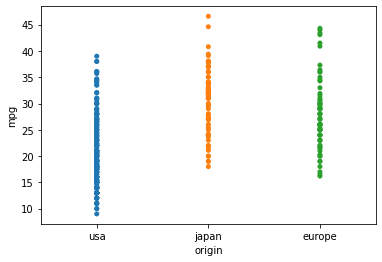

In [3]:
sns.stripplot(data=mpg, x='origin', y='mpg', jitter=False)
plt.show()

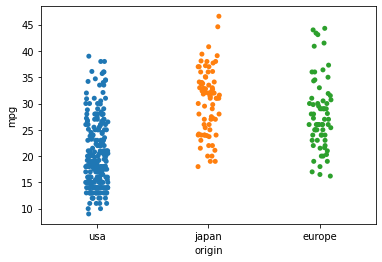

In [4]:
sns.stripplot(data=mpg, x='origin', y='mpg', jitter=True)
plt.show()

## swarmplot

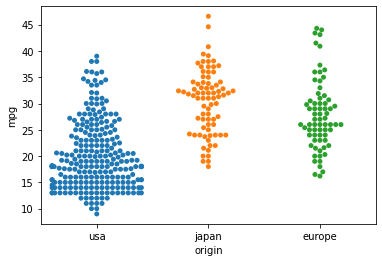

In [5]:
sns.swarmplot(data=mpg, x='origin', y='mpg')
plt.show()

## boxplot

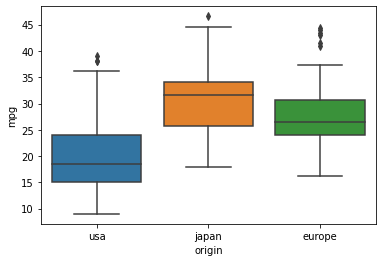

In [6]:
sns.boxplot(data=mpg, x='origin', y='mpg')
plt.show()

## violinplot

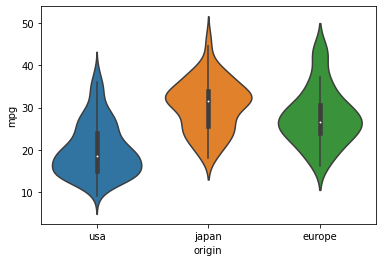

In [7]:
sns.violinplot(data=mpg, x='origin', y='mpg')
plt.show()

## boxenplot
 - a combination of boxplot and violinplot
 - computationally less expensive than violinplot

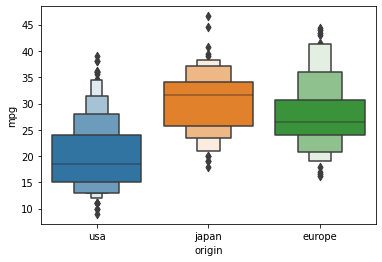

In [8]:
sns.boxenplot(data=mpg, x='origin', y='mpg')
plt.show()

## barplot

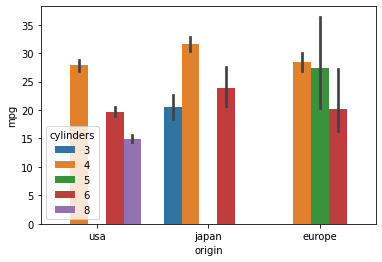

In [9]:
sns.barplot(data=mpg, x='origin', y='mpg', hue='cylinders')
plt.show()

## pointplot

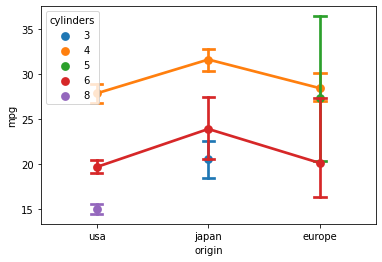

In [10]:
sns.pointplot(data=mpg, x='origin', y='mpg', hue='cylinders', capsize=.1)
plt.show()

## countplot

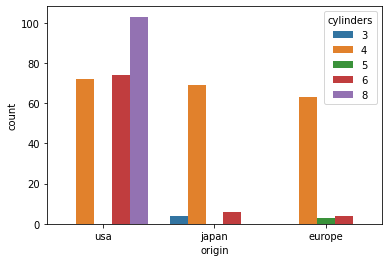

In [11]:
sns.countplot(data=mpg, x='origin', hue='cylinders')
plt.show()

# Regression Plots

In [12]:
df = pd.read_csv('bike_share.csv', parse_dates=['dteday'])
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Plotting with regplot()

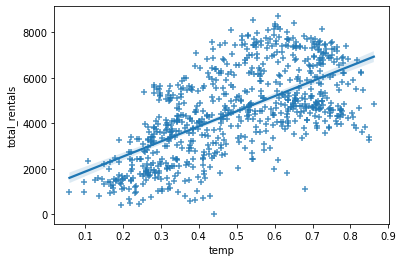

In [13]:
sns.regplot(data=df, x='temp', y='total_rentals', marker='+')
plt.show()

## Evaluatiing regression with residplot()
 - A residual plot is useful for evaluating the fit of a model
 - Seaborn supports through residplot function

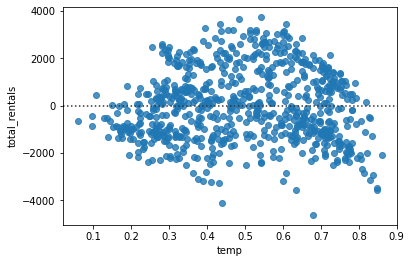

In [14]:
# residuals are not randomly distributed (they are centered toward medium temperatures)
sns.residplot(data=df, x='temp', y='total_rentals')
plt.show()

## Polynomial regression
 - Seaborn supports polynomial regression using the order parameter

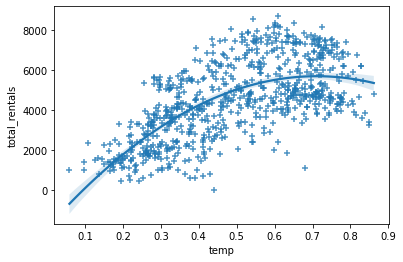

In [15]:
sns.regplot(data=df, x='temp', y='total_rentals', marker='+', order=2)
plt.show()

## Residplot with polynomial regression

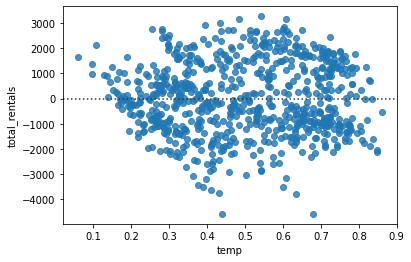

In [16]:
# residuals are less centered toward medium temperatures)
sns.residplot(data=df, x='temp', y='total_rentals', order=2)
plt.show()

## Categorical values

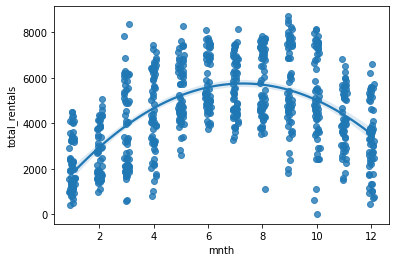

In [17]:
sns.regplot(data=df, x='mnth', y='total_rentals', x_jitter=0.1, order=2)
plt.show()

## Estimators
 - In some cases, x_estimator can be useful for highlighting trends

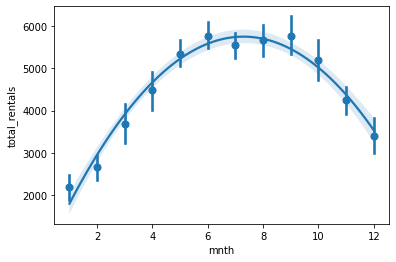

In [18]:
sns.regplot(data=df, x='mnth', y='total_rentals', x_estimator=np.mean, order=2)
plt.show()

## Binning the data
 - x_bins can be used to divide the data into discrete bins
 - The regression line is still fit against all the data

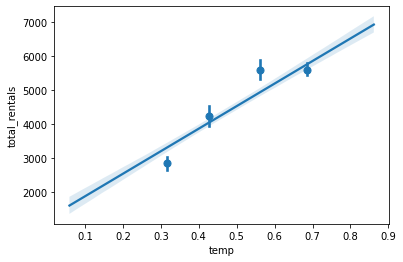

In [19]:
sns.regplot(data=df, x='temp', y='total_rentals', x_bins=4)
plt.show()

## Create a scatter plot by disabling the regression line

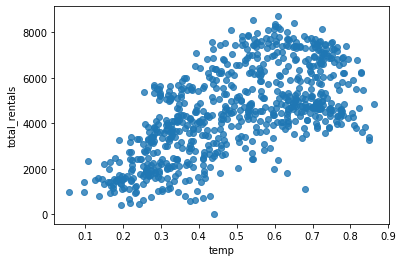

In [20]:
sns.regplot(data=df, x='temp', y='total_rentals', fit_reg=False)
plt.show()

# Matrix Plots

## Getting data in the right format
 - Seaborn's heatmap() function requires data to be in a grid format
 - pandas crosstab() is frequently used to manipulate the data

In [21]:
mnth_weekday_grid = pd.crosstab(df['mnth'], df['weekday'], values=df['total_rentals'], aggfunc='mean').round(0)
mnth_weekday_grid

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816.0,1927.0,2568.0,2139.0,2513.0,2446.0,1957.0
2,2248.0,2604.0,2824.0,2813.0,2878.0,2933.0,2266.0
3,3301.0,3546.0,3574.0,3670.0,3817.0,3926.0,3939.0
4,4417.0,4516.0,4556.0,4331.0,4764.0,4387.0,4446.0
5,5320.0,4512.0,5025.0,5119.0,5893.0,5751.0,5978.0
6,5940.0,5478.0,5681.0,5701.0,5622.0,5616.0,6344.0
7,5298.0,5792.0,5844.0,5814.0,5624.0,5406.0,5232.0
8,4703.0,5518.0,5930.0,6077.0,6038.0,5958.0,5224.0
9,6160.0,5637.0,5184.0,5668.0,5486.0,5747.0,6394.0


In [22]:
mnth_weekday_grid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
 2   2       12 non-null     float64
 3   3       12 non-null     float64
 4   4       12 non-null     float64
 5   5       12 non-null     float64
 6   6       12 non-null     float64
dtypes: float64(7)
memory usage: 768.0 bytes


In [23]:
for i in mnth_weekday_grid.columns:
    mnth_weekday_grid[i] = mnth_weekday_grid[i].astype('int')
mnth_weekday_grid

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816,1927,2568,2139,2513,2446,1957
2,2248,2604,2824,2813,2878,2933,2266
3,3301,3546,3574,3670,3817,3926,3939
4,4417,4516,4556,4331,4764,4387,4446
5,5320,4512,5025,5119,5893,5751,5978
6,5940,5478,5681,5701,5622,5616,6344
7,5298,5792,5844,5814,5624,5406,5232
8,4703,5518,5930,6077,6038,5958,5224
9,6160,5637,5184,5668,5486,5747,6394


In [24]:
## Build a heatmap

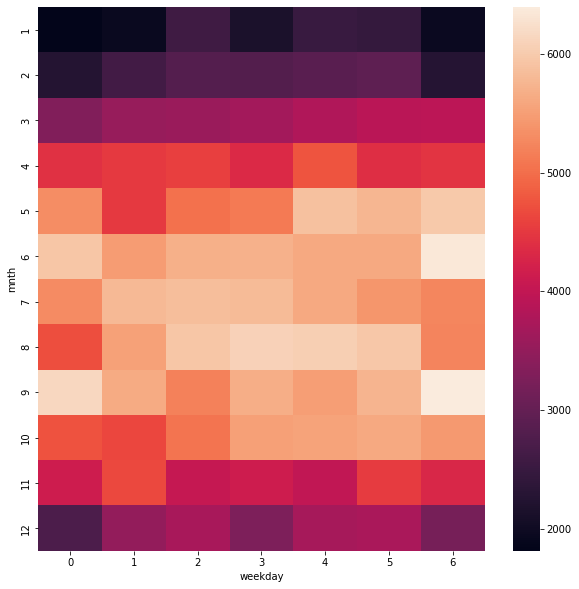

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(mnth_weekday_grid)
plt.show()

## Customize a heatmap

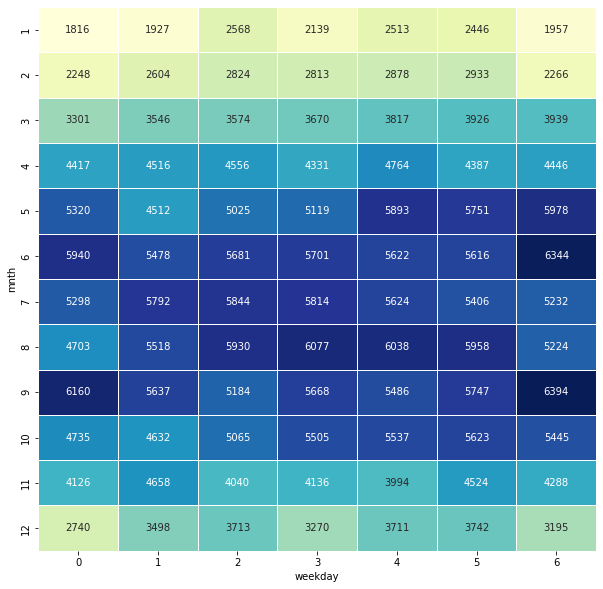

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(mnth_weekday_grid, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidth=0.5)
plt.show()

## Centering a heatmap

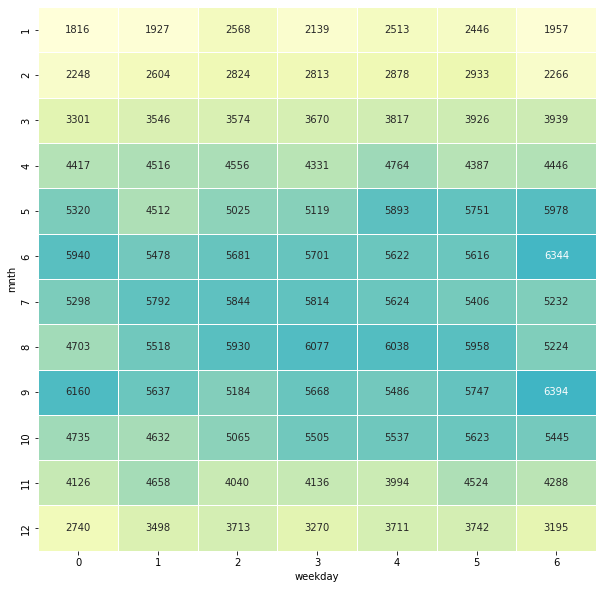

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(mnth_weekday_grid, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidth=0.5, center=mnth_weekday_grid.loc[9, 6])
plt.show()

## Plotting a correlation matrix

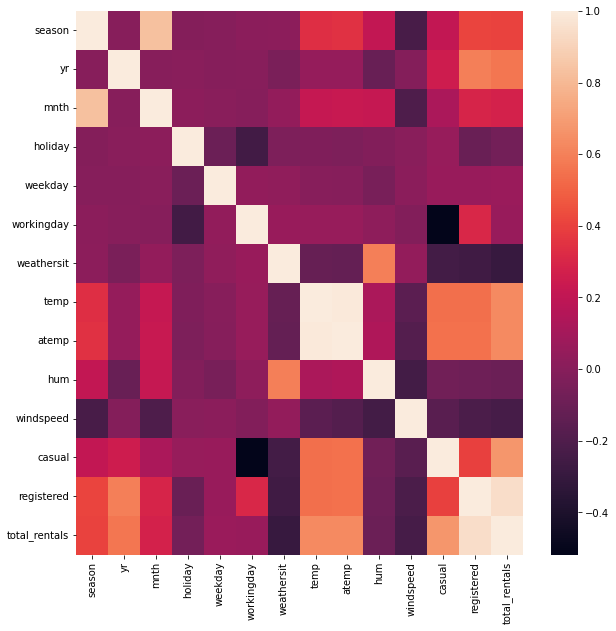

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())
plt.show()

## Customizing a correlation matrix

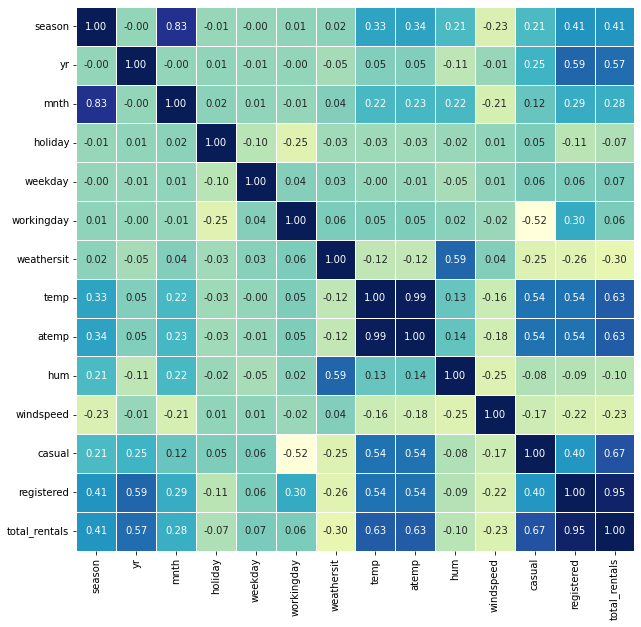

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='YlGnBu', cbar=False, linewidth=0.5)
plt.show()